In [1]:
import argparse
from src.utils import data
from src import detection
import noisereduce as nr
from engine_config import config
import json
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


args = SimpleNamespace(**{
    'threshold': 0.4, # Signal detection threshold
    'max_peak_distance_Hz': 0.5, 
    'cut_freq_Hz': 200, # Cut all frequencies above the value
    'reduce_noise': False # Reduce noise from the original signal
})

/home/artem/anaconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def visualize_preds(filename, freqs, yf, preds):
    plt.figure(figsize=(17,10))
    plt.rcParams.update({'font.size': 22})
    plt.title(filename)


    plt.plot(freqs, yf, color='black')
    for anomaly_type, anomaly_preds in preds.items():
        anomaly_freqs, anomaly_scores = [anomaly_preds[x] for x in ['locations', 'scores']]

        if anomaly_freqs is not None:
            plt.plot(anomaly_freqs, 60*np.ones_like(anomaly_freqs), "x", label=anomaly_type, mew=5, ms=10)

    plt.plot(np.zeros_like(yf), "--", color="gray")
    plt.legend()

    plt.ylabel('dB')
    plt.xlabel('Hz')
    plt.xlim((0,args.cut_freq_Hz))

# Нет поломки. Без перекосов фаза А

In [3]:
filename = 'data/0702 без перекосов фаза A.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

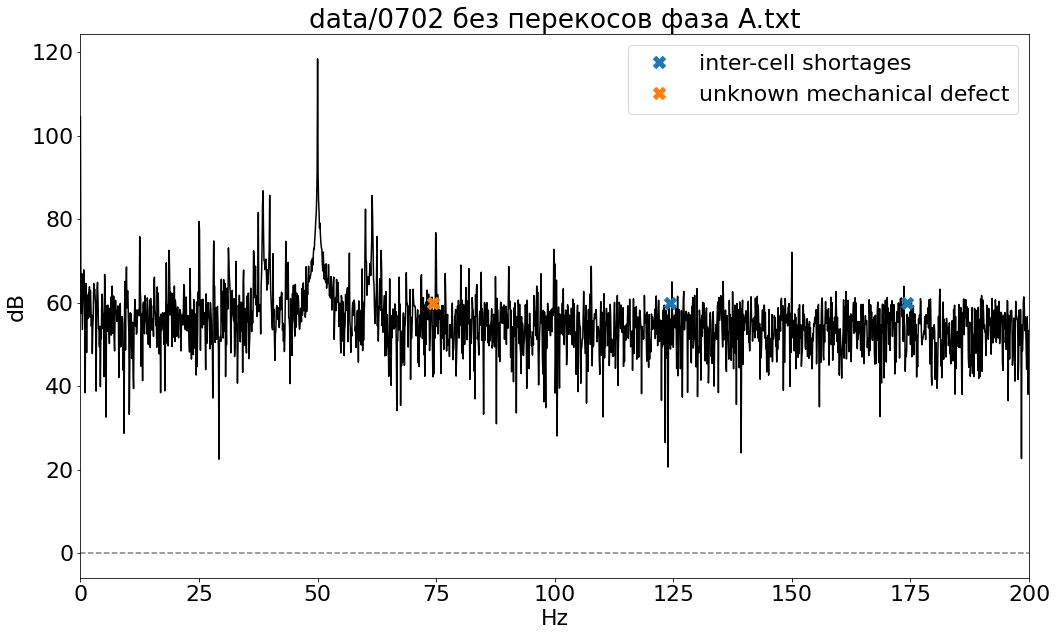

In [4]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Нет поломки. ВКЛ-ВЫКЛ нагрузка

In [5]:
filename = 'data/ВКЛ-ВЫКЛ нагрузка 100% 11 01.txt'
df = data.read(filename)
# df = get_random_window(df)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

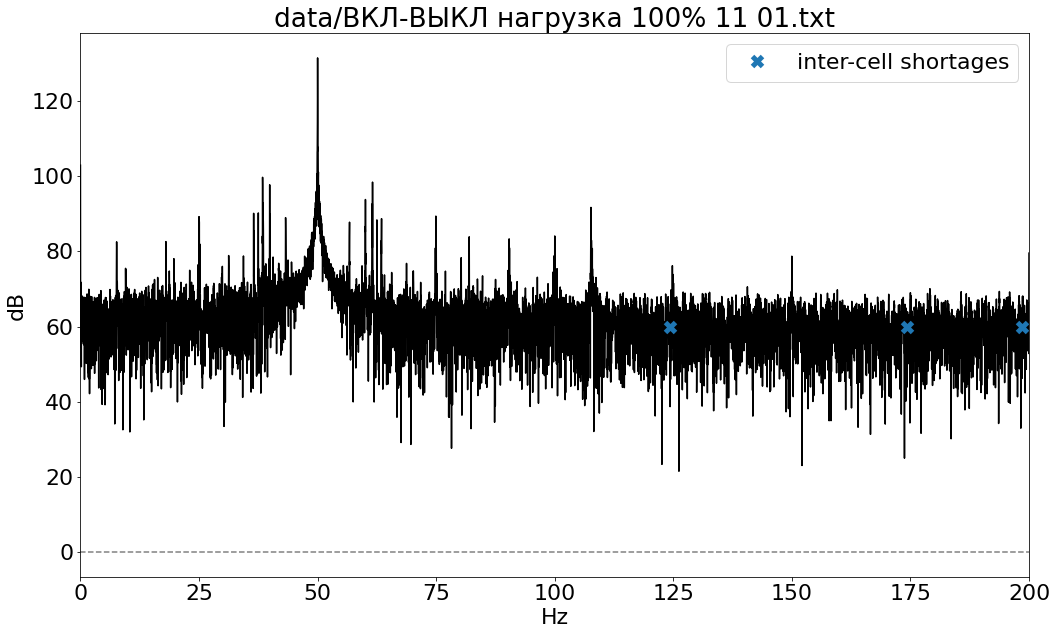

In [6]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)
visualize_preds(filename, freqs, yf, preds)

# Нет поломки. Нагрузка 0%

In [7]:
filename = 'data/холостой ход 11 01.txt'
df = data.read(filename)
# df = get_random_window(df)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

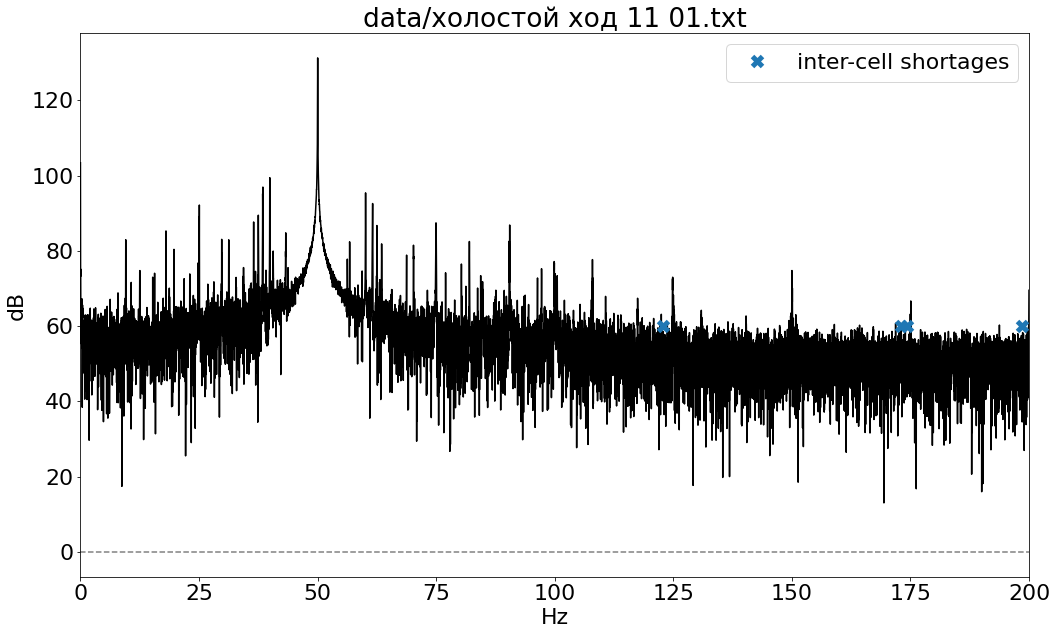

In [8]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Нет поломки. Нагрузка 100%

In [9]:
filename = 'data/нагрузка 100% 11 01.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

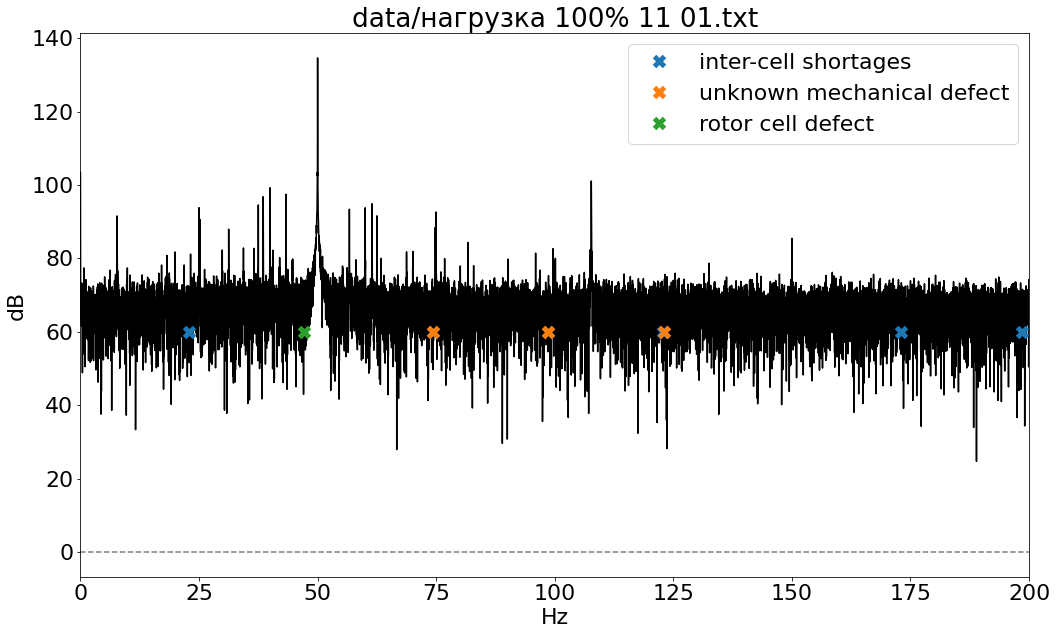

In [10]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Поломка 3. Межвитковые замыкания

In [11]:
filename = 'data/0702  межвитковые фазы A ток фазы А.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

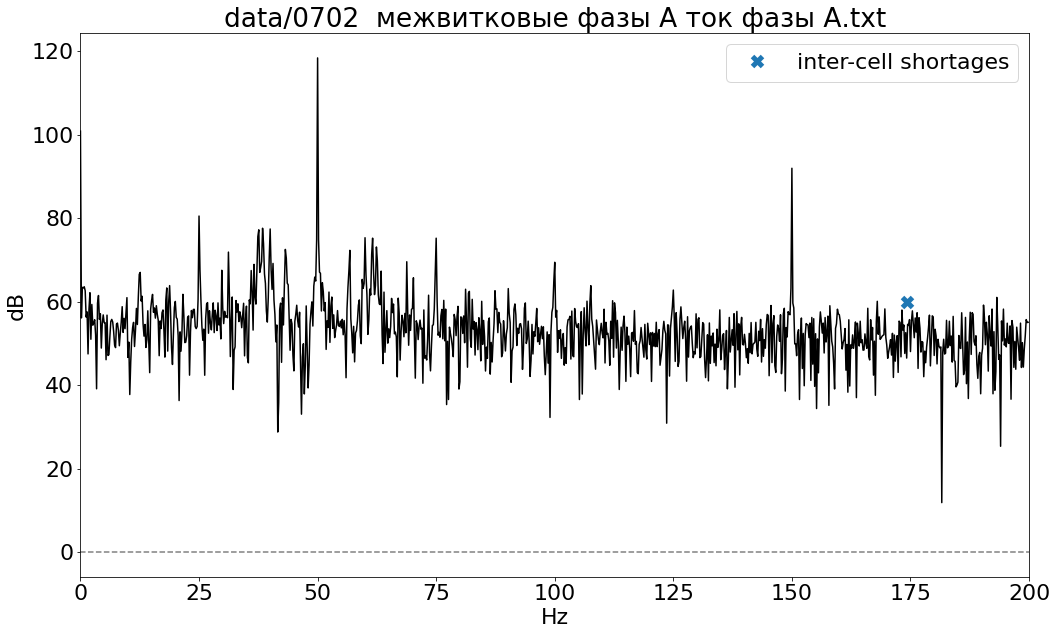

In [12]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Поломка 5. Другие механические поломки (дисбаланс ротора)

In [13]:
filename = 'data/20_01_1460_об_мин_с_дисбалансом_ротора.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

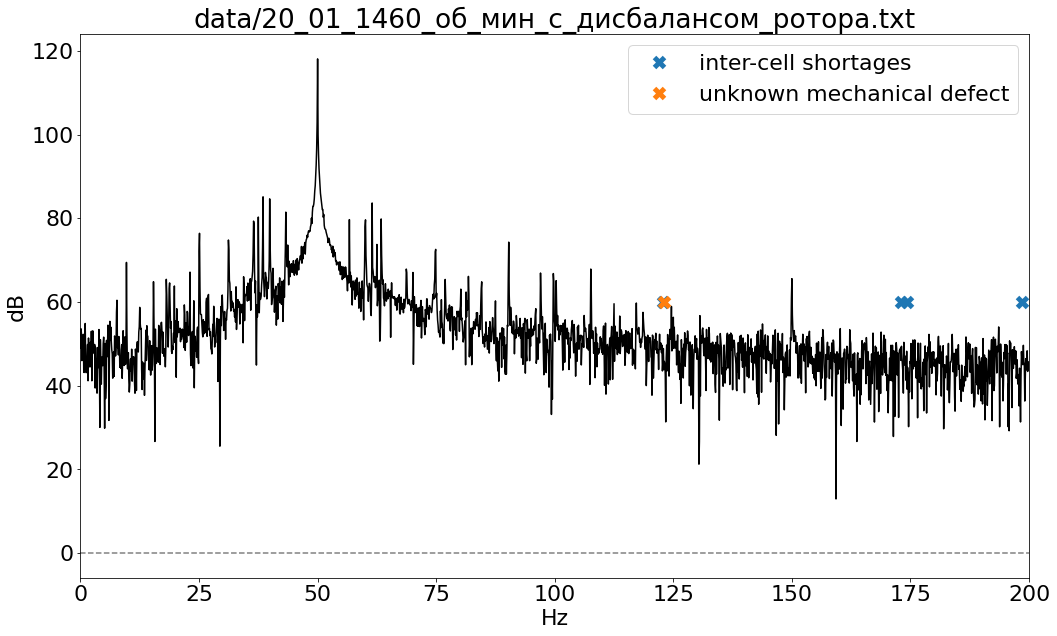

In [14]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Поломка ?. Другие электрические поломки (перекос фазы)

In [15]:
filename = 'data/0702  перекос фазы A ток фазы А.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

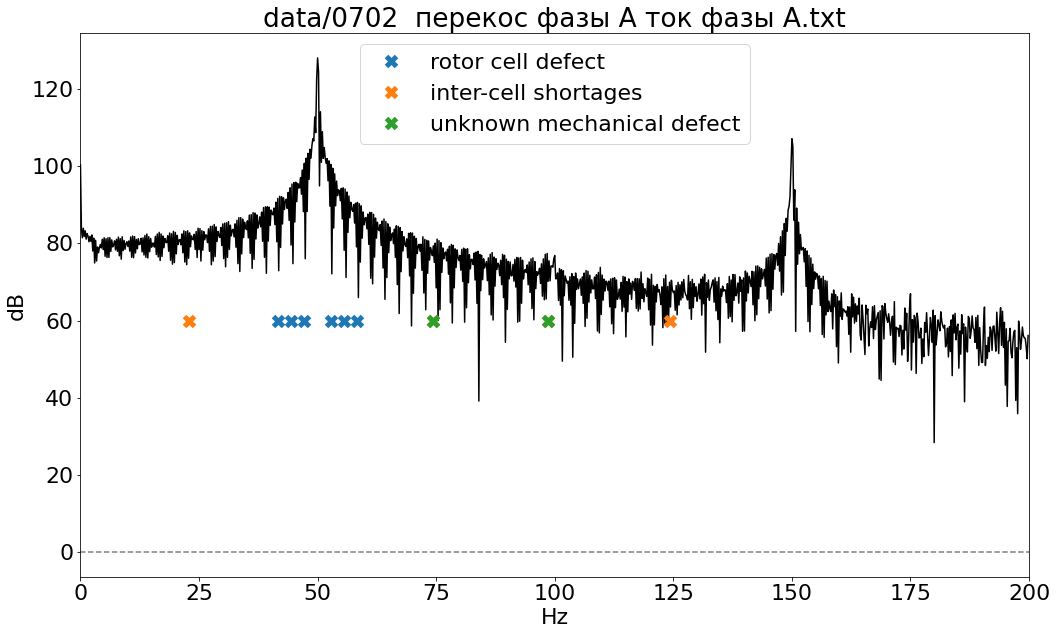

In [16]:
# preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
preds = detection.detect_bootstrap(df)

visualize_preds(filename, freqs, yf, preds)

# Confusion matrix

In [17]:
# files = {
#     'no anomalies': ['data/0702 без перекосов фаза A.txt', 'data/ВКЛ-ВЫКЛ нагрузка 100% 11 01.txt',
#                      'data/холостой ход 11 01.txt', 'data/нагрузка 100% 11 01.txt'],
#     'inter-cell shortages': ['data/0702  межвитковые фазы A ток фазы А.txt'],
#     'unknown mechanical defect': ['data/20_01_1460_об_мин_с_дисбалансом_ротора.txt'],
# }
# from glob import glob
# for filename in glob('data/*.txt'):
#     if not filename.split('/')[1].startswith('21'): continue
#     if "дисбаланс" in filename:
#         files['unknown mechanical defect'].append(filename)
#     else:
#         files['no anomalies'].append(filename)

In [18]:
files = {
    'no anomalies': ['data/ВКЛ-ВЫКЛ нагрузка 100% 11 01.txt',
                     'data/нагрузка 100% 11 01.txt'],
    'inter-cell shortages': ['data/0702  межвитковые фазы A ток фазы А.txt'],
    'unknown mechanical defect': ['data/20_01_1460_об_мин_с_дисбалансом_ротора.txt'],
}
from glob import glob
for filename in glob('data/*.txt'):
    if not filename.split('/')[1].startswith('21'): continue
    if 'нагрузка 100' not in filename: continue
    if "дисбаланс" in filename:
        files['unknown mechanical defect'].append(filename)
    else:
        files['no anomalies'].append(filename)

In [19]:
files

{'no anomalies': ['data/ВКЛ-ВЫКЛ нагрузка 100% 11 01.txt',
  'data/нагрузка 100% 11 01.txt',
  'data/21 02 нагрузка 100.txt',
  'data/21 02 без ПЧ нагрузка 100 5 минут.txt',
  'data/21 02 нагрузка 100 2.txt'],
 'inter-cell shortages': ['data/0702  межвитковые фазы A ток фазы А.txt'],
 'unknown mechanical defect': ['data/20_01_1460_об_мин_с_дисбалансом_ротора.txt',
  'data/21 02 дисбаланс 100 без ПЧ нагрузка 100.txt',
  'data/21 02 дисбаланс 100 без ПЧ нагрузка 100 5 минут.txt']}

In [36]:
SINGLE_DETECTION_THRESHOLDS = {
    'inter-cell shortages': 0.07,
    'rotor cell defect': 0.13,
    'unknown mechanical defect': 0.00,
    'bearing defect (rotation body)': 0.0,
    'bearing defect (outer track)': 0.0,
    'bearing defect (inner track)': 0.0,
    'air gap eccentricity': 0.0
}


BOOTSTRAP_THRESHOLDS = {
    'inter-cell shortages': 0.05,
    'rotor cell defect': 0.30,
    'unknown mechanical defect': 0.06,
    'bearing defect (rotation body)': 0.0,
    'bearing defect (outer track)': 0.0,
    'bearing defect (inner track)': 0.0,
    'air gap eccentricity': 0.0
}

y_true, y_pred, scores = [], [], []
for anomaly_type, filenames in files.items():
    for filename in filenames:
        try:
            df = data.read(filename)
        except pd.errors.ParserError:
            continue
#         preds = detection.detect(freqs, yf, max_peak_distance_Hz=args.max_peak_distance_Hz, thresh=args.threshold)
        preds = detection.detect_bootstrap(df, bootstrap_cnt=100,
                                           detection_threshold=SINGLE_DETECTION_THRESHOLDS,
                                          bootstrap_thresh=BOOTSTRAP_THRESHOLDS, reduce_noise=True)
        for p, v in preds.items():
            y_pred.append(p)
            scores.append(v['scores'])
            y_true.append(anomaly_type)
        if len(preds) == 0:
            y_pred.append('no anomalies')
            scores.append([])
            y_true.append(anomaly_type)

In [37]:
for scores_, y_true_, y_pred_ in zip(scores, y_true, y_pred):
#     if y_true_ != 'no anomalies':
    print(y_true_)
    print(y_pred_)
    if scores_:
        print(np.mean(scores_))
    else:
        print('-')
    print('************')

no anomalies
inter-cell shortages
0.05903972578158486
************
no anomalies
inter-cell shortages
0.07215645263868647
************
no anomalies
no anomalies
-
************
no anomalies
no anomalies
-
************
no anomalies
no anomalies
-
************
inter-cell shortages
inter-cell shortages
0.076698115232671
************
unknown mechanical defect
no anomalies
-
************
unknown mechanical defect
no anomalies
-
************


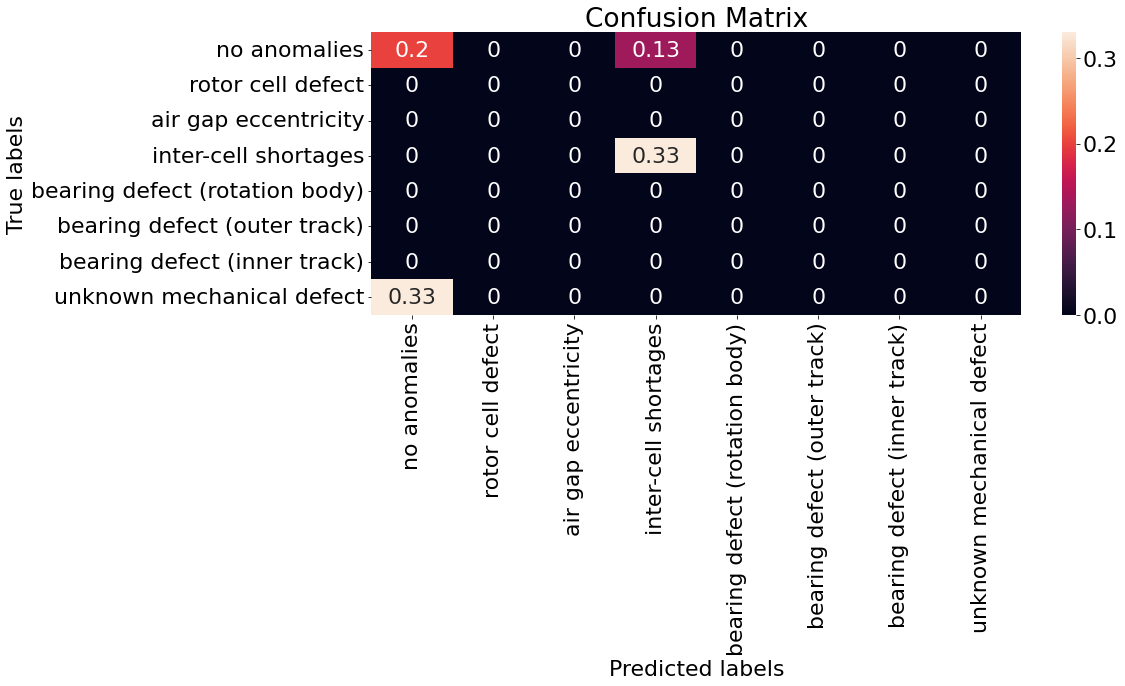

In [38]:
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from collections import Counter

plt.figure(figsize=(17,10))
labels = ['no anomalies', 'rotor cell defect', 'air gap eccentricity',
                                       'inter-cell shortages', 'bearing defect (rotation body)',
                                       'bearing defect (outer track)', 'bearing defect (inner track)',
                                       'unknown mechanical defect']
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred,
                               labels=labels, normalize='all', sample_weight=[1./Counter(y_true)[x] for x in y_true]).round(2)

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels, rotation=90); ax.yaxis.set_ticklabels(labels, rotation=0);
plt.tight_layout()